# IJava Jupyter Tutorial
This notebook contains a tutorial for using Java inside Jupyter notebooks. 

Jupyter is a great tool for a variety of situations. It's a natural tool for instances when you want to mix code and text together. In this notebook, for example, I'm writing a tutorial that shows how to use Java inside of Jupyter, which includes written instructions as well as example executable code.

## Installation
This section contains information about installing the required tools to use Java Jupyter notebooks.

#### Install Anaconda
To install the tools required to use Java Jupyter notebooks, I recommend using the [Anaconda](https://www.anaconda.com/) distribution. Anaconda is a cross-platform Python environment for data science. Its main advantage is that it works great on Windows out-of-the-box and comes with a variety of data science tools pre-installed. You can download your [platform's installer file](https://www.anaconda.com/distribution/) and install it like any other application.

Once you have installed Anaconda, you can open up the *Anaconda Navigator* application to see the main environment:

<img src="images/anaconda-navigator.png" alt="Navigator Main Screen" style="width: 800px;"/>

From this screen, you can launch the *JupyterLab* application. This will open up a browser-based application that lets you create, edit, and run Jupyter notebooks. Out-of-the-box you can create Python notebooks, but you have to install some more tools before you can run Java notebooks.

#### Install Java 9
Next, you need to install the required version of Java, which is the [Java 9 JDK](https://www.oracle.com/technetwork/java/javase/downloads/java-archive-javase9-3934878.html) or higher. You should be able to install Java 9 alongside another JDK such as Java 8.

**NOTE**: Make sure to install the full JDK, not just the JRE. Java Jupyter notebooks will not work without having the full JDK installed.

#### Install IJava
[IJava](https://github.com/SpencerPark/IJava) is an open-source tool that integrates Java 9's JShell tool with Jupyter's kernel system, allowing you to use Java inside a Jupyter notebook.

The README file in that GitHub repository contains the main instructions for using the tool. See the [installation section](https://github.com/SpencerPark/IJava#install-pre-built-binary) of that document to see how to download and install the tool.

The main gist of the installation is that once you have downloaded the pre-built release ZIP file, you should run this command from the unzipped directory:
```
python3 install.py --sys-prefix
```

That command will install IJava as a Jupyter kernel

#### Optional: Configure IJava to use Java 9
This step is not necessary if Java 9 is the only version of Java on your machine. If, however, you have Java 8 installed concurrently, then you will want to tell IJava which version to pick.

This [GitHub issue](https://github.com/SpencerPark/IJava/issues/12) explains the process for telling IJava to use Java 9.

## Running Java Code
Now that you have IJava installed, you can run some Java code:

In [1]:
System.out.println("Hello, world!");

Hello, world!


Notice that you can execute expressions at the top-level without being explicitly inside a class method. This is probably a little odd if you haven't used the JShell REPL before, but fits in very nicely with Jupyter notebooks.

You can of course use JVM classes like you normally would:

In [2]:
List<String> names = new ArrayList<String>();
names.add("David");
System.out.println(names);

[David]


Above you used *System.out.println()* to print what you wanted, but in Jupyter the last line often auto-prints to the console, allowing you to just do this:

In [3]:
names

[David]

As you would hope, you can also define your own classes just like you normally would:

In [9]:
public class SuperSimpleClass {
    public String someString;
    public int someInt;
    
    public String toString() {
        return String.format("SuperSimpleClass(someString=%s, someInt=%s)", someString, someInt);
    }
}

SuperSimpleClass testObj = new SuperSimpleClass();
testObj.someString = "David";
testObj.someInt = 100;
testObj

SuperSimpleClass(someString=David, someInt=100)

## Using Maven Dependencies
It would also be great if you could import third-party dependencies, and sure enough you can:

In [13]:
%maven com.fasterxml.jackson.core:jackson-core:2.9.8
%maven com.fasterxml.jackson.core:jackson-databind:2.9.8
%maven com.fasterxml.jackson.core:jackson-annotations:2.9.8

The above Maven statements take the Maven artifact coordinates (group ID, artifact ID, and version) and import those JARs to make them available for use in this notebook:

In [14]:
import com.fasterxml.jackson.databind.ObjectMapper;

ObjectMapper mapper = new ObjectMapper();
mapper.writeValueAsString(testObj);

{"someString":"David","someInt":100}

## Creating Charts
A core part of many Jupyter notebooks is using visual charts to convey information. You can do use various charting libraries to do this in a Java notebook:

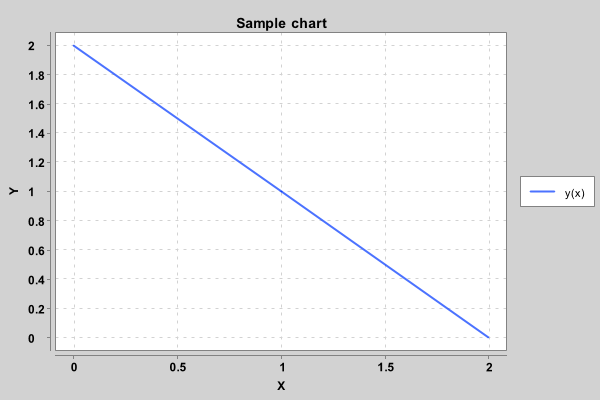

In [15]:
%maven org.knowm.xchart:xchart:3.5.2
    
import org.knowm.xchart.*;

double[] xData = new double[] {0.0, 1.0, 2.0};
double[] yData = new double[] {2.0, 1.0, 0.0};

XYChart chart = QuickChart.getChart("Sample chart", "X", "Y", "y(x)", xData, yData);

BitmapEncoder.getBufferedImage(chart);

## Sharing Notebooks
When you run a Jupyter notebook, each cell that runs saves its interactive output in the notebook. This means you can run a notebook and the results of your execution will be saved for future viewing. Anyone else who opens up the notebook will see the results of your execution. This is a nice behavior for when you want to show someone the results of an experiment you ran.

GitHub will automatically display Jupyter notebooks in their UI, so an easy way to share notebooks is by uploading them to GitHub and sending someone the link to your notebook.